In [53]:
# Importe libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Reading the Data 

df= pd.read_csv(r'C:\Users\kunal\Desktop\Movie Portfolio Project using PYTHON\movies.csv')

In [54]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [55]:
# Checking if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [56]:
# Removing all the missing data from the Dataset

df = df.dropna()

In [57]:
# Checking for confirming the changes in dataframe

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [58]:
# Creating a new release date column

df[['release_date', 'release_country']] = df['released'].str.split('(',n=1, expand=True) # Using string.splti function to slip column in two


In [59]:
# checking the datafarme for change

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


In [60]:
# Deleting unrequired column 

df.drop('release_country', inplace=True, axis=1)


In [61]:
# Data type for our columns
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
release_date     object
dtype: object

In [62]:
# Changing Data type of column

df['release_date']= pd.to_datetime(df['release_date'])

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df.dtypes

name                    object
rating                  object
genre                   object
year                     int64
released                object
score                  float64
votes                    int64
director                object
writer                  object
star                    object
country                 object
budget                   int64
gross                    int64
company                 object
runtime                float64
release_date    datetime64[ns]
dtype: object

In [63]:
# Creat correct year column

df['year_correct'] = df['release_date'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [64]:
# Customizing the number of row display of dataframe

pd.set_option('display.max_rows', None)

In [65]:
# Sorting the dataframe according to highest gross value

df= df.sort_values(by=['gross'], inplace= False, ascending= False)

In [66]:
# Budget high Correlation
# Company High Correlation

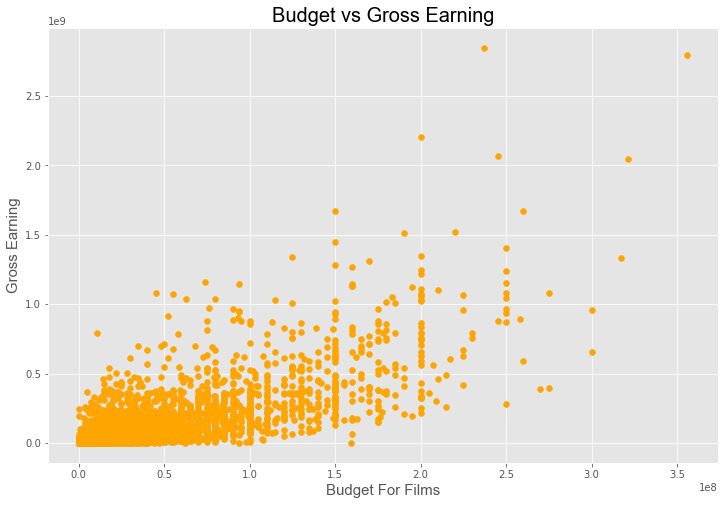

In [67]:
# Scatter Plot with Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'], color= 'orange')


plt.title('Budget vs Gross Earning', fontdict= {'family': 'arial','size':20} )

plt.xlabel('Budget For Films', fontdict= {'family': 'arial','size':15})
plt.ylabel('Gross Earning', fontdict= {'family': 'arial','size':15})

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

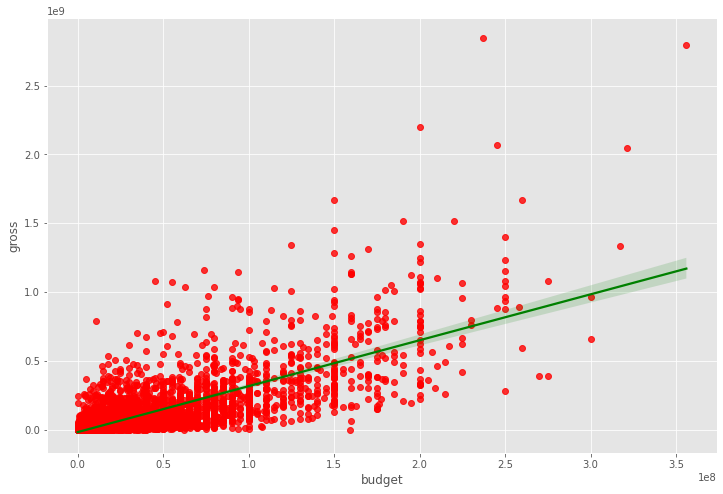

In [68]:
# Plot the budget vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws= {"color":"red"}, line_kws= {"color": "green"})

In [69]:
# Let's look at Correlation

In [70]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [71]:
# High correlation between budget and gross

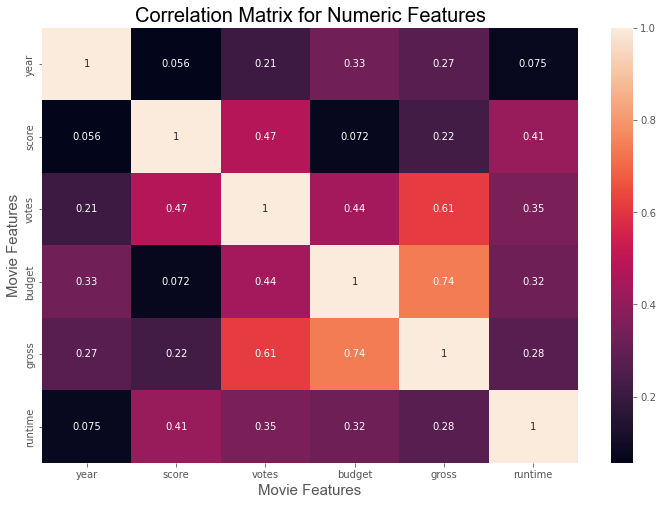

In [72]:
# Visualizing the correlation between columns

correlation_matrix= df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features', fontdict= {'family': 'arial','size':20} )

plt.xlabel('Movie Features', fontdict= {'family': 'arial','size':15})
plt.ylabel('Movie Features', fontdict= {'family': 'arial','size':15})

plt.show()

In [73]:
# Assigning the numerical value to the string data for correlation

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year_correct
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009-12-18,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019-04-26,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997-12-19,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015-12-18,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018-04-27,38
7480,4388,4,2,2019,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118.0,2019-07-19,39
6653,2117,5,0,2015,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124.0,2015-06-12,35
6043,3878,5,0,2012,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0,2012-05-04,32
6646,1541,5,0,2015,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137.0,2015-04-03,35
7494,1530,4,2,2019,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103.0,2019-11-22,39


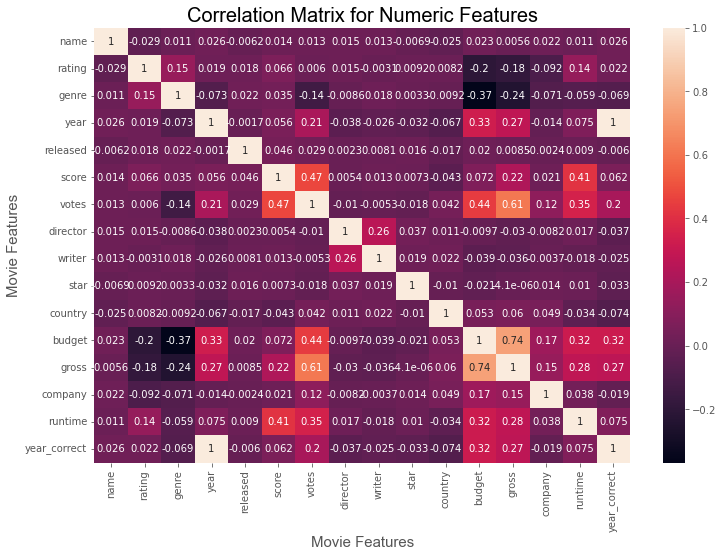

In [74]:
# Correlation of whole dataframe

correlation_matrix= df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features', fontdict= {'family': 'arial','size':20} )

plt.xlabel('Movie Features', fontdict= {'family': 'arial','size':15})
plt.ylabel('Movie Features', fontdict= {'family': 'arial','size':15})

plt.show()

In [75]:
# Column with higest Correlation

correlation_mat= df_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [76]:
sorted_pairs= corr_pairs.sort_values()

sorted_pairs # Sorting correlation lowest to higest

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
country       year_correct   -0.073569
year_correct  country        -0.073569
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
genre         year_correct   -0.069147
year_correct  genre          -0.069147
year          country        -0.066748
country       year           -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
score         country        -0.043051
country       score      

In [77]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          year_correct    0.998726
year_correct  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [78]:
# Votes and Budget have the higest correlation to Gross Earnings

# Company has low correlation
